Visualize a single experiment.

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import json
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [42]:
with open('experiments_log.json', 'r') as file:
    experiments = json.loads(file.read())

print(experiments.keys())

print(experiments['quadratic_model_1_input_25']['function'])

print(experiments['quadratic_model_1_input_25']['input_text'])


dict_keys(['linear_model_1_input_15', 'linear_model_1_input_5', 'linear_model_1_input_8', 'linear_model_2_input_15', 'linear_model_3_input_20', 'quadratic_model_1_input_25', 'quadratic_model_2_input_25', 'quadratic_model_2_input_25_smaller_variance', 'quadratic_model_2_input_25_smaller_variance_bigger_range', 'sine_input_15', 'sine_input_30', '2d_class_type_1_rstate_42', '2d_class_type_1_rstate_55', '2d_class_type_1_rstate_93', '2d_class_type_2_rstate_42', '2d_class_type_2_rstate_55', '2d_class_type_2_rstate_93', '2d_class_type_3_rstate_42', '2d_class_type_3_rstate_55', '2d_class_type_3_rstate_93', '2d_class_type_4_rstate_42', '2d_class_type_4_rstate_55', '2d_class_type_4_rstate_93', '2d_class_type_5_rstate_42', '2d_class_type_5_rstate_55', '2d_class_type_5_rstate_93', '2d_class_type_7_rstate_42', '2d_class_type_7_rstate_55', '2d_class_type_7_rstate_93', '2d_class_type_8_rstate_42', '2d_class_type_8_rstate_55', '2d_class_type_8_rstate_93', '2d_class_type_6_rstate_42', '2d_class_type_6_

'\n\npoints = np.linspace(0, 100, 200)\ndef fn(x):\n    x = 44*x + 201\n    x = round(x)\n    return x\n\nfn = np.vectorize(fn)\n\nplt.plot(points, fn(points), color=\'black\', label="True regression line")\n\nax.plot([0, 100], [train_implied_lm.intercept_,\n                    train_implied_lm.coef_[0]*100 + train_implied_lm.intercept_],\n            ls=\'--\', color=\'b\', label="Best fit on train examples")\n\n#ax.plot([0, 100], [test_implied_lm.intercept_,\n#                    test_implied_lm.coef_[0]*100 + test_implied_lm.intercept_],\n#            ls=\'--\', color=\'r\', label="Best fit of GPT predictions")\nax.set_xlabel("Input")\nax.set_ylabel("Output")\nplt.legend(loc=\'upper right\')\nplt.show()\n'

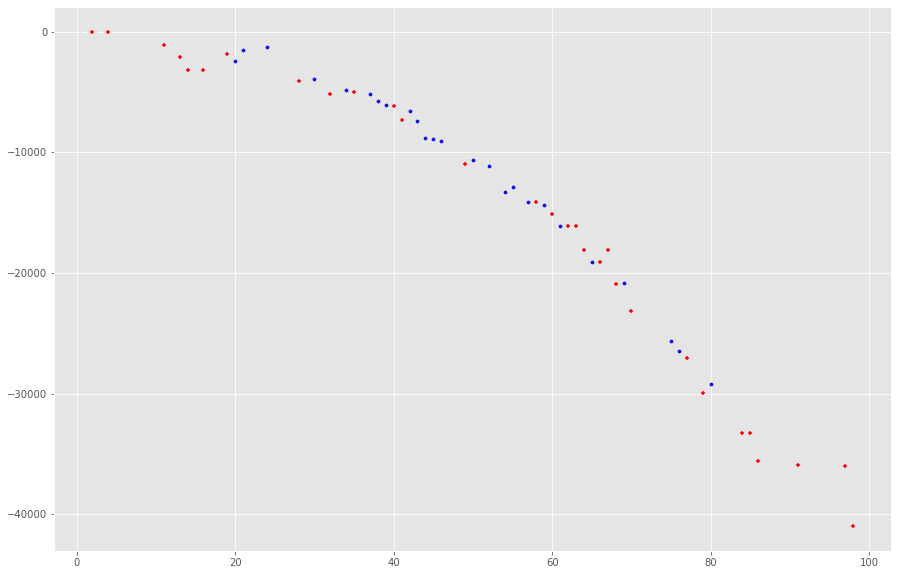

In [43]:
experiment_name = 'quadratic_model_1_input_25'

experiment = experiments[experiment_name]

x_train, y_train = experiment['input_train'], experiment['output_train']
x_test, y_test = experiment['input_test'], experiment['output_test_cleaned']

#train_implied_lm = LinearRegression().fit(np.array(x_train).reshape(-1, 1),
                                       #     y_train)
#test_implied_lm = LinearRegression().fit(np.array(x_test).reshape(-1, 1),
                                      #      y_test)



fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x_train, y_train, s=10, c='b', marker="o", label='Train examples')
ax.scatter(x_test, y_test, s=10, c='r', marker="+", label='GPT predictions')

# quadratic_model_1_input_25:
#ax.plot([0, 100], [201, 44*100 + 201], c='black', label='True regression line')
"""

points = np.linspace(0, 100, 200)
def fn(x):
    x = 44*x + 201
    x = round(x)
    return x

fn = np.vectorize(fn)

plt.plot(points, fn(points), color='black', label="True regression line")

ax.plot([0, 100], [train_implied_lm.intercept_,
                    train_implied_lm.coef_[0]*100 + train_implied_lm.intercept_],
            ls='--', color='b', label="Best fit on train examples")

#ax.plot([0, 100], [test_implied_lm.intercept_,
#                    test_implied_lm.coef_[0]*100 + test_implied_lm.intercept_],
#            ls='--', color='r', label="Best fit of GPT predictions")
ax.set_xlabel("Input")
ax.set_ylabel("Output")
plt.legend(loc='upper right')
plt.show()
"""

In [44]:
xs = experiment['input_train'] + experiment['input_test']

labels = ['train']*len(experiment['input_train']) + \
         ['gpt']*len(experiment['input_test'])

ys = experiment['output_train'] + experiment['output_test_cleaned']

df = pd.DataFrame(
    {'x' : xs,
     'y' : ys,
     'from' : labels}
)

In [45]:
df.to_csv(experiment_name + '.csv')

In [56]:
linear_model_preds = train_implied_lm.predict(np.array(x_test).reshape(-1, 1))
ground_truth = fn(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error

In [64]:
print(mean_absolute_error(linear_model_preds, ground_truth))
print(mean_absolute_error(y_test, ground_truth))

33.84522396385851
35.5
